# Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import scipy.stats
from statistics import NormalDist
from scipy.stats import gaussian_kde
from scipy.stats import shapiro,jarque_bera
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import shapiro

# Data

In [3]:
# Membaca dataset dengan library pandas
df = pd.read_csv('nyc-rolling-sales.csv')

# Menampilkan data teratas dan tail
df 

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [4]:
df.shape

(84548, 22)

In [5]:
print("Baris : ", df.shape[0])
print("Kolom : ", df.shape[1])

Baris :  84548
Kolom :  22


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [7]:
df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [8]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [9]:
df.isna().any()

Unnamed: 0                        False
BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
EASE-MENT                         False
BUILDING CLASS AT PRESENT         False
ADDRESS                           False
APARTMENT NUMBER                  False
ZIP CODE                          False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
dtype: bool

In [10]:
df.duplicated().sum()

0

# Cleaning Data

Buat salinan data asli dengan mendefinisikannya sebagai df

In [11]:
nyc_property = pd.read_csv("nyc-rolling-sales.csv")

In [12]:
nyc_property.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


mencetak nama kolom-kolom columns dari suatu DataFrame

In [13]:
print(nyc_property.columns)

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')


In [14]:
df = nyc_property.copy()

Hapus kolom yang tidak relevan

In [15]:
df = df.drop(["Unnamed: 0"],axis=1)

In [16]:
df.columns = df.columns.str.replace(" ","_")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING_CLASS_CATEGORY         84548 non-null  object
 3   TAX_CLASS_AT_PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING_CLASS_AT_PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT_NUMBER                84548 non-null  object
 10  ZIP_CODE                        84548 non-null  int64 
 11  RESIDENTIAL_UNITS               84548 non-null  int64 
 12  COMMERCIAL_UNITS                84548 non-null

Konversikan ke variabel numerik

In [18]:
numeric = ["RESIDENTIAL_UNITS","COMMERCIAL_UNITS","TOTAL_UNITS", "LAND_SQUARE_FEET" , "GROSS_SQUARE_FEET","SALE_PRICE"]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [19]:
# List nama kolom yang akan diubah menjadi variabel kategorikal
categorical_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT',
                        'BUILDING_CLASS_AT_PRESENT', 'ZIP_CODE', 'YEAR_BUILT',
                        'BUILDING_CLASS_AT_TIME_OF_SALE', 'TAX_CLASS_AT_TIME_OF_SALE']

# Mengonversi kolom menjadi variabel kategorikal menggunakan pd.Categorical
for col in categorical_columns:
    df[col] = pd.Categorical(df[col])

Konversikan ke variabel datetime

In [20]:
df["SALE_DATE"] = pd.to_datetime(df["SALE_DATE"])

Mengganti nama wilayah
- 1 = Manhattan 
- 2 = Bronx
- 3 = Brooklyn
- 4 = Queens 
- 5 = Staten Island

In [21]:
def renaming_borough(x):
    if x == 1:
        return "Manhattan"
    elif x == 2:
        return "Bronx"
    elif x == 3:
        return "Brooklyn"
    elif x == 4:
        return "Queens"
    else:
        return "Staten Island"
    
df["BOROUGH"] = df["BOROUGH"].apply(renaming_borough)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [22]:
# Ganti spasi kosong dengan NaN
df.replace(' ', np.nan, inplace=True)

# Hitung persentase nilai yang hilang di setiap kolom
missing_percentage = df.isna().mean() * 100

In [23]:
print(missing_percentage)

BOROUGH                             0.000000
NEIGHBORHOOD                        0.000000
BUILDING_CLASS_CATEGORY             0.000000
TAX_CLASS_AT_PRESENT                0.872877
BLOCK                               0.000000
LOT                                 0.000000
EASE-MENT                         100.000000
BUILDING_CLASS_AT_PRESENT           0.872877
ADDRESS                             0.000000
APARTMENT_NUMBER                   77.466055
ZIP_CODE                            0.000000
RESIDENTIAL_UNITS                   0.000000
COMMERCIAL_UNITS                    0.000000
TOTAL_UNITS                         0.000000
LAND_SQUARE_FEET                   31.049818
GROSS_SQUARE_FEET                  32.658372
YEAR_BUILT                          0.000000
TAX_CLASS_AT_TIME_OF_SALE           0.000000
BUILDING_CLASS_AT_TIME_OF_SALE      0.000000
SALE_PRICE                         17.222170
SALE_DATE                           0.000000
dtype: float64


In [24]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING_CLASS_CATEGORY               0
TAX_CLASS_AT_PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING_CLASS_AT_PRESENT           738
ADDRESS                               0
APARTMENT_NUMBER                  65496
ZIP_CODE                              0
RESIDENTIAL_UNITS                     0
COMMERCIAL_UNITS                      0
TOTAL_UNITS                           0
LAND_SQUARE_FEET                  26252
GROSS_SQUARE_FEET                 27612
YEAR_BUILT                            0
TAX_CLASS_AT_TIME_OF_SALE             0
BUILDING_CLASS_AT_TIME_OF_SALE        0
SALE_PRICE                        14561
SALE_DATE                             0
dtype: int64

Menghapus beberapa kolom yang spesifik

In [25]:
df = df.drop(["EASE-MENT","APARTMENT_NUMBER", "BLOCK", "LOT", "ADDRESS"],axis=1)

Menghapus baris yang memiliki nilai-nilai kosong (NaN) pada kolom

In [26]:
df = df.dropna(subset=["TAX_CLASS_AT_PRESENT","BUILDING_CLASS_AT_PRESENT"])

Mengisi nilai-nilai kosong (NaN) dengan nilai 0 pada kolom dalam DataFrame

In [27]:
for i in ["LAND_SQUARE_FEET","GROSS_SQUARE_FEET","SALE_PRICE"]:
    df[i] = df[i].fillna(0)

Baris dengan nilai "SALE_PRICE" yang 0 akan dihapus dari DataFrame.

In [28]:
df = df[df["SALE_PRICE"] != 0]

In [29]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BUILDING_CLASS_AT_PRESENT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,D9,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,B9,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,B9,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,B2,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,K6,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


Kelompokkan semua subkelas menjadi 4 kelas utama

In [30]:
df["BUILDING_CLASS_AT_PRESENT"] = df["BUILDING_CLASS_AT_PRESENT"].str[0]

In [31]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BUILDING_CLASS_AT_PRESENT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,D,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


Menambahkan kolom baru bernama "YEAR" ke dalam DataFrame dan Kolom ini diisi dengan tahun dari setiap nilai dalam kolom "SALE_DATE".

In [32]:
df["YEAR"] = [i.year for i in df["SALE_DATE"]]

{'whiskers': [<matplotlib.lines.Line2D at 0x2273ca79490>,
 'caps': [<matplotlib.lines.Line2D at 0x2273d3ca290>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2273d3bbf50>],
 'medians': [<matplotlib.lines.Line2D at 0x2273d3cba10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2273d3d1250>],
 'means': [<matplotlib.lines.Line2D at 0x2273d3d0590>]}

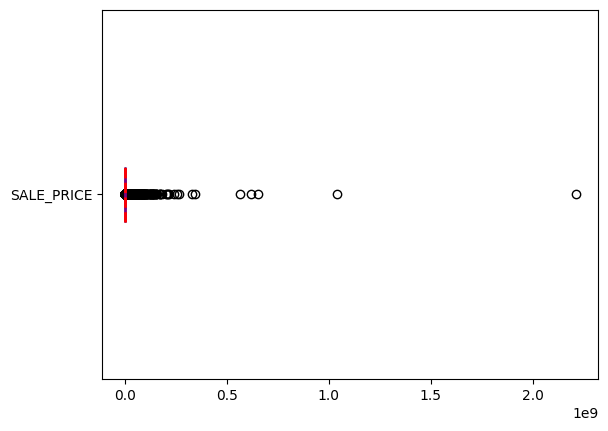

In [33]:
# Membuat boxplot dengan Matplotlib
fig, ax = plt.subplots()
ax.boxplot(df['SALE_PRICE'], vert=False, showmeans=True, meanline=True,
           labels=['SALE_PRICE'], patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})

Menghapus outlier dengan metode IQR

In [34]:
sale_price_q1 = df["SALE_PRICE"].describe().loc["25%"]
sale_price_q3 = df["SALE_PRICE"].describe().loc["75%"]
sale_price_iqr = sale_price_q3 - sale_price_q1

sale_price_lower_limit = sale_price_q1 - (1.5 * sale_price_iqr)
sale_price_upper_limit = sale_price_q3 + (1.5 * sale_price_iqr)

In [35]:
outliers_removed = df[(df["SALE_PRICE"] >= sale_price_lower_limit) & (df["SALE_PRICE"] <= sale_price_upper_limit)]
outliers_removed.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BUILDING_CLASS_AT_PRESENT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,YEAR
12,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C,10009,0,0,0,0.0,0.0,1920,2,C6,1.0,2016-09-06,2016
13,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C,10009,0,0,0,0.0,0.0,1920,2,C6,499000.0,2017-03-10,2017
14,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C,10009,0,0,0,0.0,0.0,1920,2,C6,10.0,2017-04-28,2017
15,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C,10009,0,0,0,0.0,0.0,1920,2,C6,529500.0,2017-06-09,2017
16,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C,10009,0,0,0,0.0,0.0,1920,2,C6,423000.0,2017-07-14,2017


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='SALE_PRICE'>

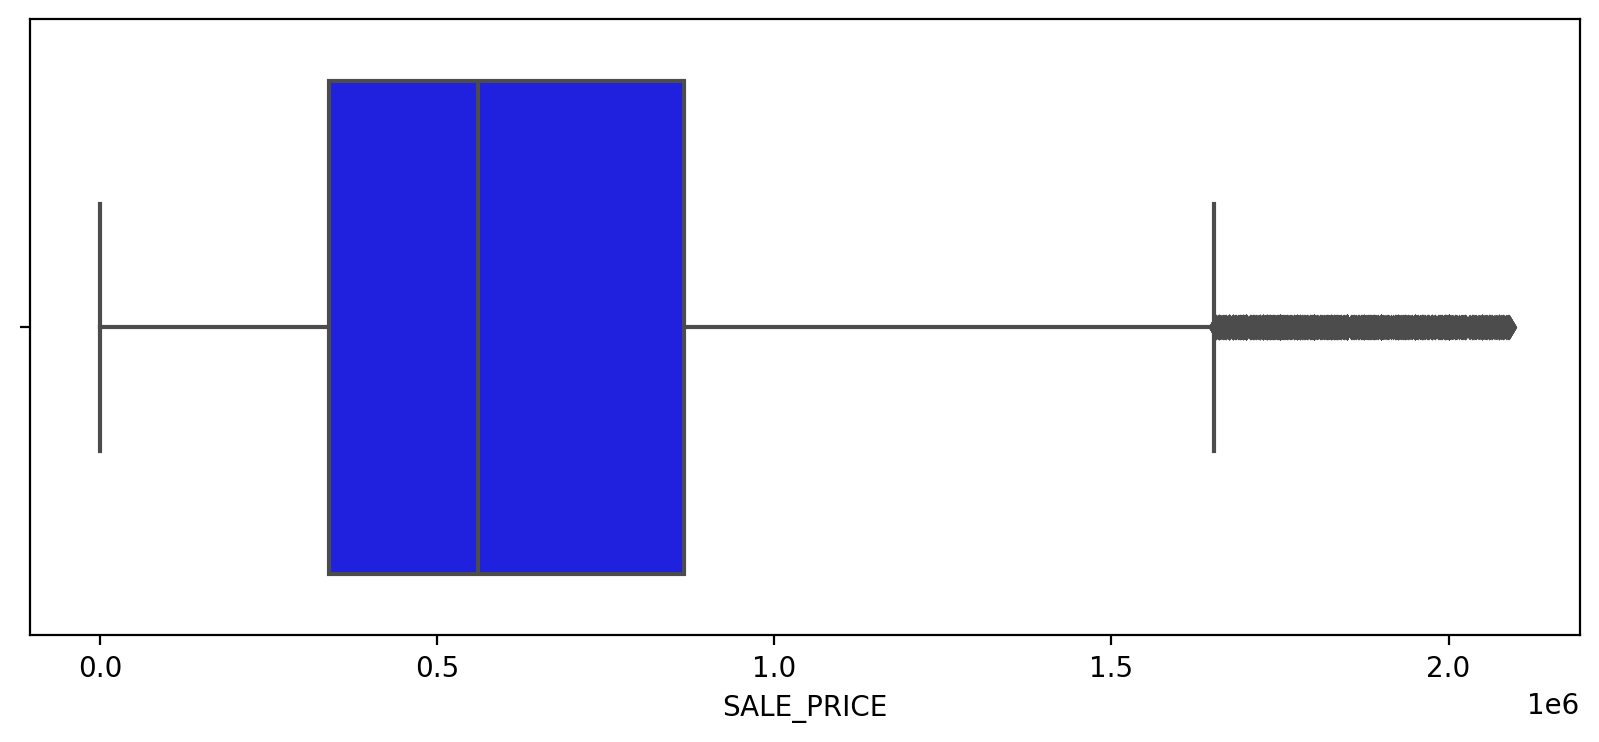

In [36]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=outliers_removed,x="SALE_PRICE", color="blue")

Karena masih banyak outlier, ulangi langkah di atas sebanyak yang diperlukan.

In [37]:
n = 1
limit = 2

while n <= limit:
    sale_price_q1 = outliers_removed["SALE_PRICE"].describe().loc["25%"]
    sale_price_q3 = outliers_removed["SALE_PRICE"].describe().loc["75%"]
    sale_price_iqr = sale_price_q3 - sale_price_q1

    sale_price_lower_limit = sale_price_q1 - (1.5 * sale_price_iqr)
    sale_price_upper_limit = sale_price_q3 + (1.5 * sale_price_iqr)

    outliers_removed = outliers_removed[(outliers_removed["SALE_PRICE"] >= sale_price_lower_limit) & (outliers_removed["SALE_PRICE"] <= sale_price_upper_limit)]
    
    n += 1

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='SALE_PRICE'>

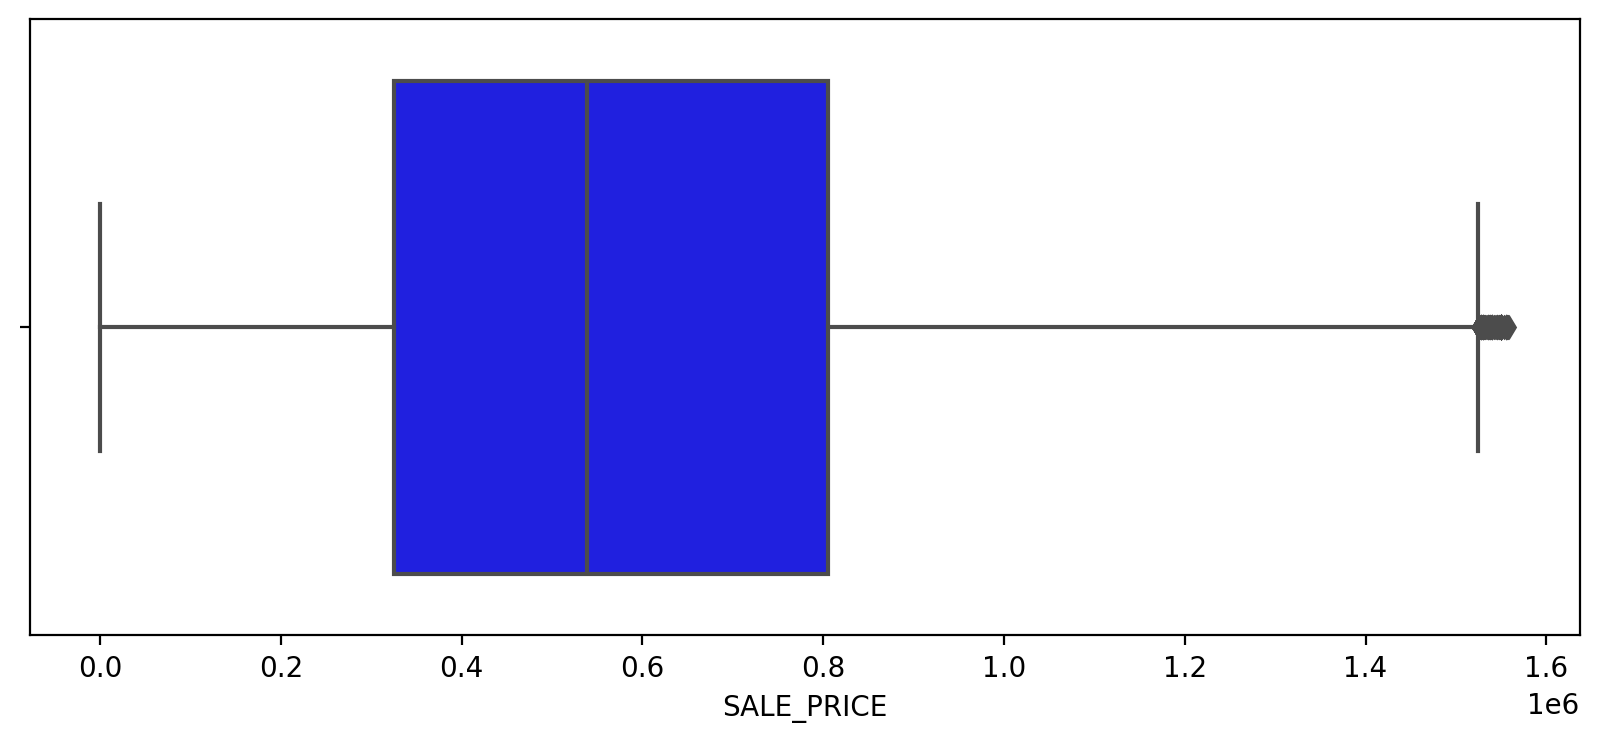

In [38]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=outliers_removed,x="SALE_PRICE", color="blue")

# Measures of Central Tendency
---
Menemukan measures of central tendency
- Mean 
- Median 
- Mode 
- Range 
- Variance
- Standard Deviation

In [39]:
mct = outliers_removed.groupby(["BOROUGH","BUILDING_CLASS_AT_PRESENT","YEAR"]).agg({"SALE_PRICE":[np.mean,
                                                                                    np.median,
                                                                                    statistics.mode,
                                                                                   np.ptp,
                                                                                   np.var,
                                                                                   np.std]})
mct = mct.reset_index()
mct.columns = mct.columns.droplevel(-1)
mct.columns = ['BOROUGH','BUILDING_CLASS_AT_PRESENT','YEAR','MEAN','MEDIAN','MODE','RANGE','VARIANCE','STANDARD_DEVIATION']
mct = mct.dropna()
mct

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14688\761368934.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mct = outliers_removed.groupby(["BOROUGH","BUILDING_CLASS_AT_PRESENT","YEAR"]).agg({"SALE_PRICE":[np.mean,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14688\761368934.py:1: FutureWarning: The provided callable <function mean at 0x0000022735539080> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mct = outliers_removed.groupby(["BOROUGH","BUILDING_CLASS_AT_PRESENT","YEAR"]).agg({"SALE_PRICE":[np.mean,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14688\761368934.py:1: FutureWarning: The provided callable <function median at 0x0000022735679620> is currently using SeriesGr

,BOROUGH,BUILDING_CLASS_AT_PRESENT,YEAR,MEAN,MEDIAN,MODE,RANGE,VARIANCE,STANDARD_DEVIATION
0,Manhattan,A,2016,1.001448e+06,1000000.0,1375000.0,1067758.0,1.909133e+11,436936.253145
1,Manhattan,A,2017,3.021925e+05,36255.0,10.0,1509990.0,2.854313e+11,534257.668432
2,Manhattan,B,2016,1.204500e+06,1310000.0,1310000.0,1050000.0,1.811638e+11,425633.351607
3,Manhattan,B,2017,7.530519e+05,850000.0,1386200.0,1549990.0,2.909754e+11,539421.326131
4,Manhattan,C,2016,5.476793e+05,473000.0,10.0,1524999.0,1.349916e+11,367412.020412
...,...,...,...,...,...,...,...,...,...
219,Staten Island,S,2017,3.959197e+05,402000.0,25000.0,900000.0,5.248968e+10,229106.270267
222,Staten Island,V,2016,3.577857e+05,280000.0,650000.0,1265000.0,1.079070e+11,328492.016367
223,Staten Island,V,2017,3.324611e+05,295292.0,350000.0,1199990.0,7.792322e+10,279147.313163
224,Staten Island,W,2016,1.000000e+00,1.0,1.0,0.0,0.000000e+00,0.000000


Visualisasikan rata-rata SALE_PRICE dari kategori BUILDING_CLASS_AT_PRESENT di setiap wilayah

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


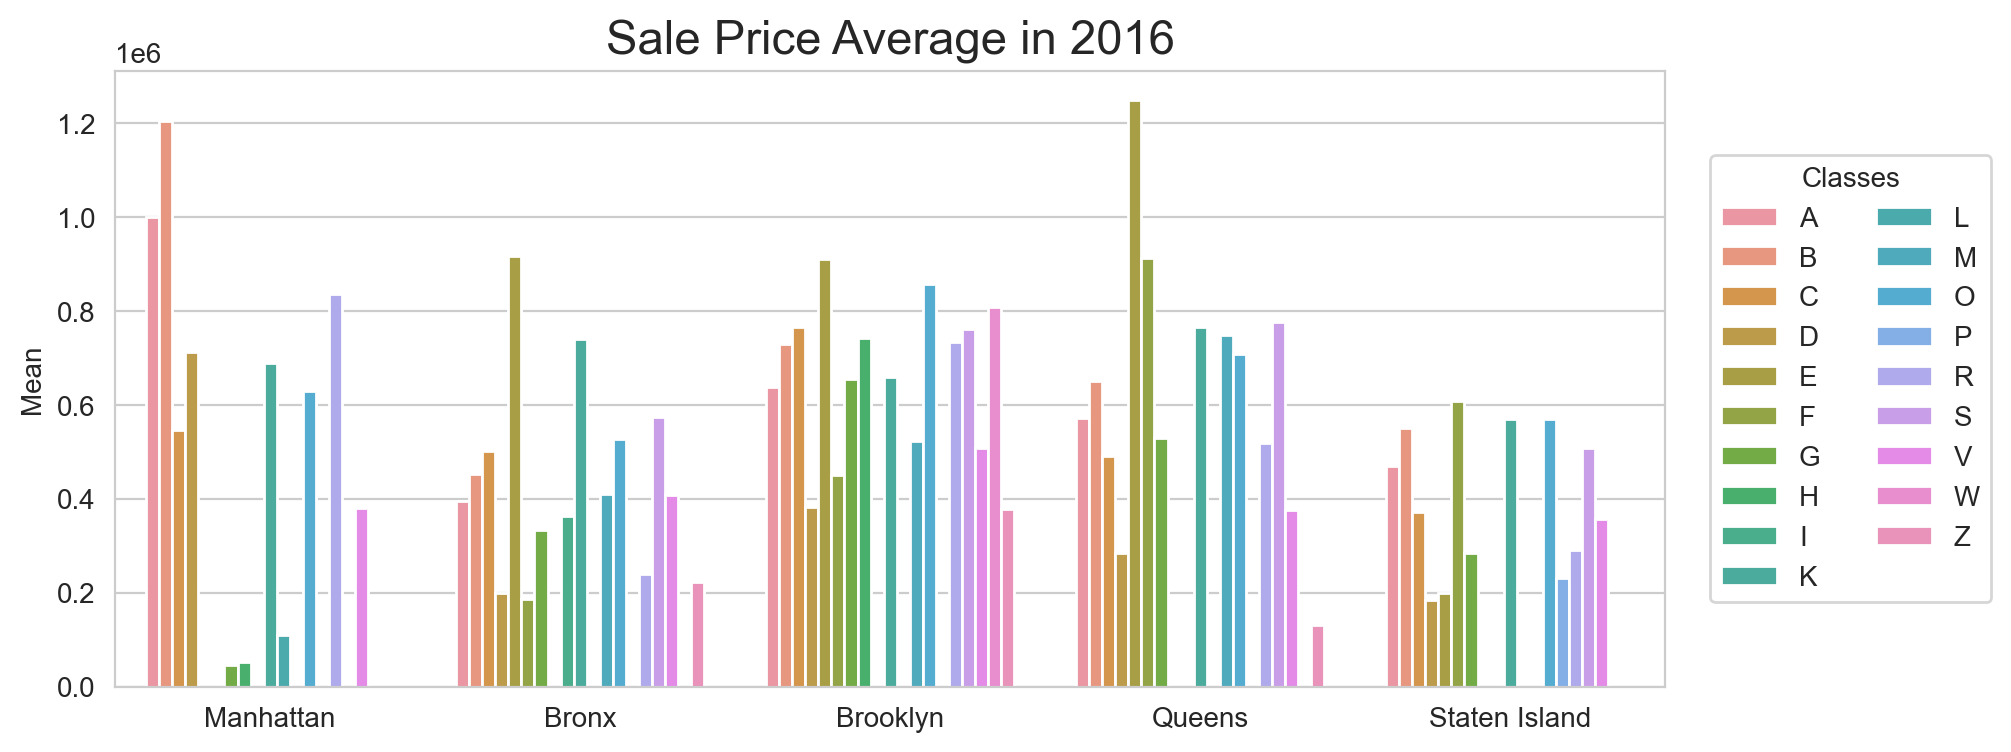

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


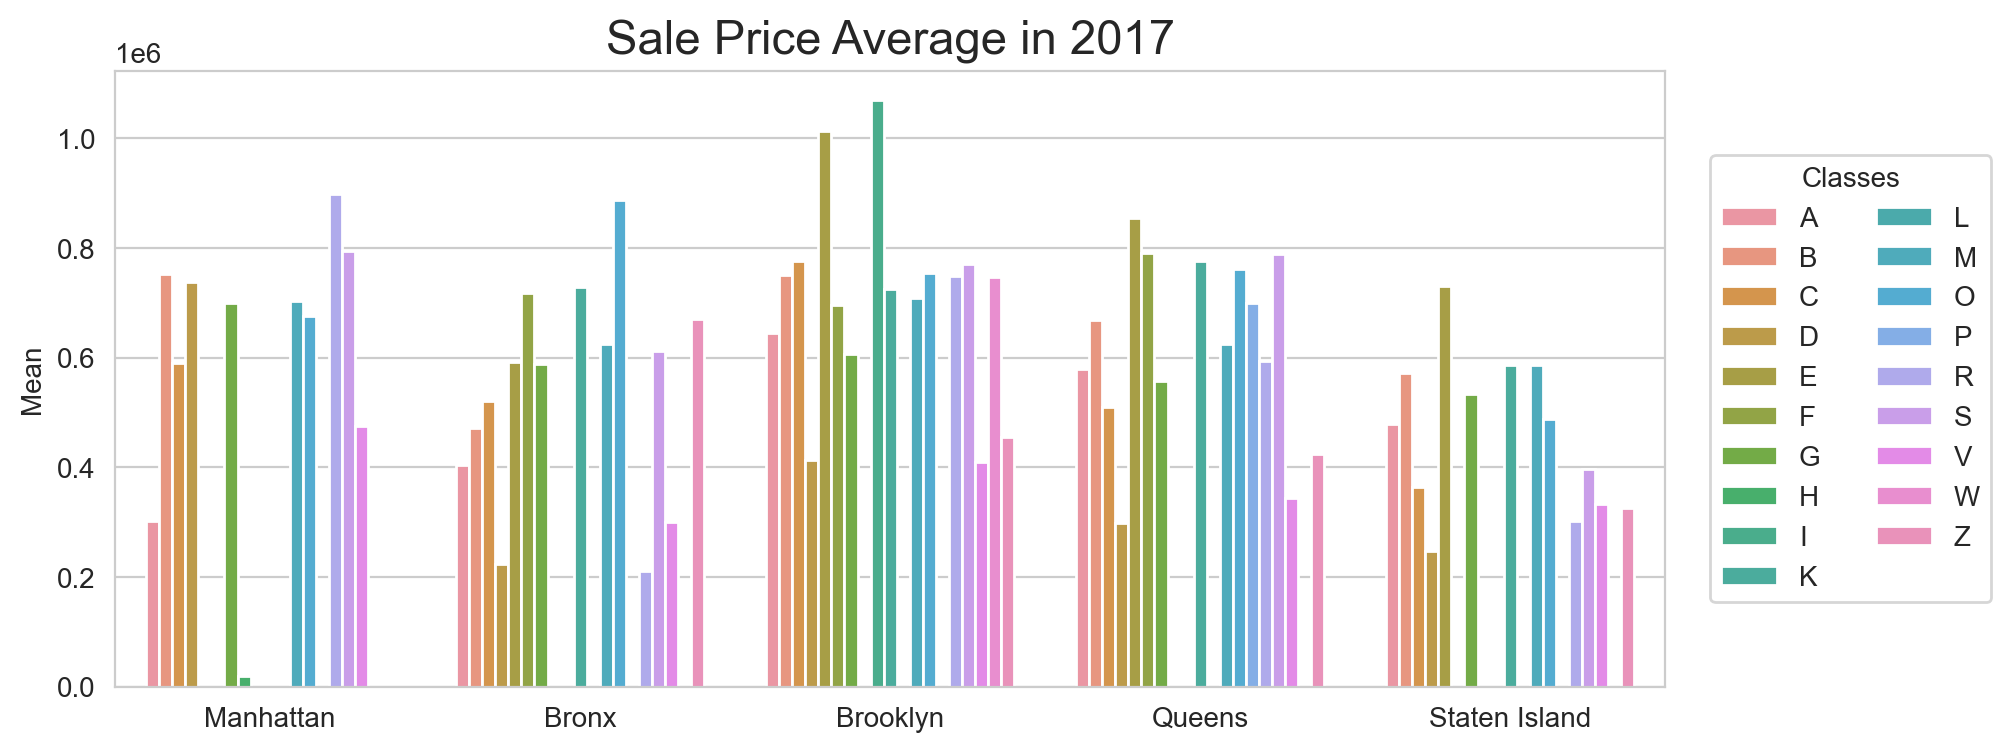

In [40]:
for i in mct["YEAR"].unique():

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(10,4),dpi=200)
        sns.barplot(data=mct[mct["YEAR"] == i],x="BOROUGH",y="MEAN",hue="BUILDING_CLASS_AT_PRESENT",hue_order=np.sort(mct["BUILDING_CLASS_AT_PRESENT"].unique()))
        plt.title(f"Sale Price Average in {i}", fontsize=17)
        plt.xlabel("")
        plt.ylabel("Mean")
        plt.legend(bbox_to_anchor=(1.02,0.5),loc="center left",title="Classes",ncol=2)
        plt.show()

# Probability Distribution & Hypothesis Testing

Bagi kumpulan data berdasarkan BOROUGH, BUILDING_CLASS_AT_PRESENT, dan YEAR yang memiliki 1 rata-rata tertinggi di SALE_PRICE. Kemudian buat array SALE_PRICE

In [41]:
top_1 = mct[mct["YEAR"] == 2017].sort_values("MEAN",ascending=False).head(1)
top_1

,BOROUGH,BUILDING_CLASS_AT_PRESENT,YEAR,MEAN,MEDIAN,MODE,RANGE,VARIANCE,STANDARD_DEVIATION
109,Brooklyn,I,2017,1070000.0,1070000.0,975000.0,190000.0,1.805000e+10,134350.288425


In [42]:
top_1_sale_price = np.array(df[(df["BOROUGH"]==top_1["BOROUGH"].iloc[0]) & 
                               (df["BUILDING_CLASS_AT_PRESENT"]==top_1["BUILDING_CLASS_AT_PRESENT"].iloc[0]) &
                               (df["YEAR"]==top_1["YEAR"].iloc[0])]["SALE_PRICE"])
top_1_sale_price 

array([ 4300000.,  7750184., 11750000.,  5757500., 27813450.,  8550000.,
         975000.,  1165000.])

Visualisasikan dengan histogram untuk memeriksa normalitas secara visual dan memeriksa normalitas secara formal menggunakan Kolmorogov-Smirnov dengan koreksi signifikansi Lilliefors dan uji Shapiro-Wilk.

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


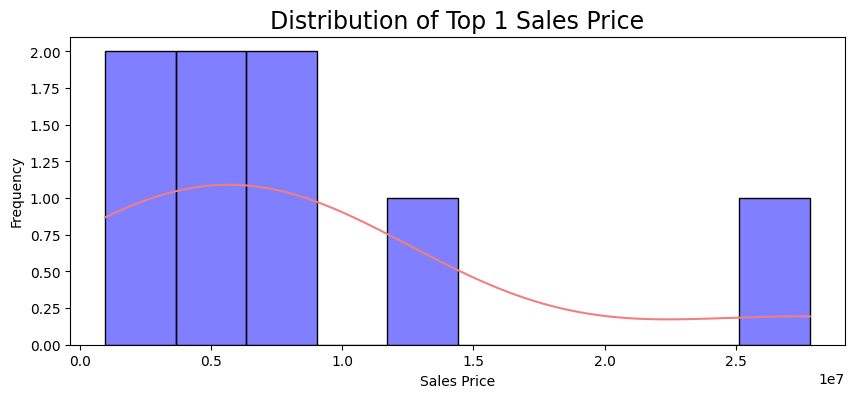

,Kolmogorov-Smirnov,Prob. (K-S),Shapiro-Wilk,Prob. (S-W)
,0.248039,0.171827,0.804168,0.031717


In [43]:
plt.figure(figsize=(10,4), dpi=100)
ax = sns.histplot(data=top_1_sale_price,bins=10,kde=True, color="blue")
ax.lines[0].set_color("lightcoral")
plt.xlabel("Sales Price")
plt.ylabel("Frequency")
plt.title("Distribution of Top 1 Sales Price", fontsize=17)

plt.show()

ks_stat,ks_pval = lilliefors(top_1_sale_price,dist="norm",pvalmethod="approx")
sw_stat,sw_pval = shapiro(top_1_sale_price)
pd.DataFrame({
    "Kolmogorov-Smirnov":[ks_stat],
    "Prob. (K-S)":[ks_pval],
    "Shapiro-Wilk":[sw_stat],
    "Prob. (S-W)":[sw_pval]
},index=[""])

Berdasarkan keluaran diatas terlihat secara visual bahwa sebaran tersebut mempunyai skewness positif yang cukup besar, sehingga dapat disimpulkan bahwa data tidak berdistribusi normal. Maka secara formal probabilitas Kolmogorov-Smirnov $= 0.172 > \alpha = 0.05$ dan probabilitas Shapiro-Wilk $= 0.03 < \alpha = 0.05$ sehingga dapat disimpulkan bahwa data tidak berdistribusi normal. Oleh karena itu, asumsi normalitas secara visual dan formal belum terpenuhi sehingga perlu dilakukan transformasi.

In [44]:
transform = np.log10(top_1_sale_price)
transform

array([6.63346846, 6.88931201, 7.07003787, 6.76023395, 7.44425486,
       6.93196611, 5.98900462, 6.06632593])

Kemudian ulangi dengan langkah yang sama, visualisasikan dengan histogram untuk memeriksa normalitas secara visual dan memeriksa normalitas secara formal menggunakan Kolmorogov-Smirnov dengan koreksi signifikansi Lilliefors dan uji Shapiro-Wilk.

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


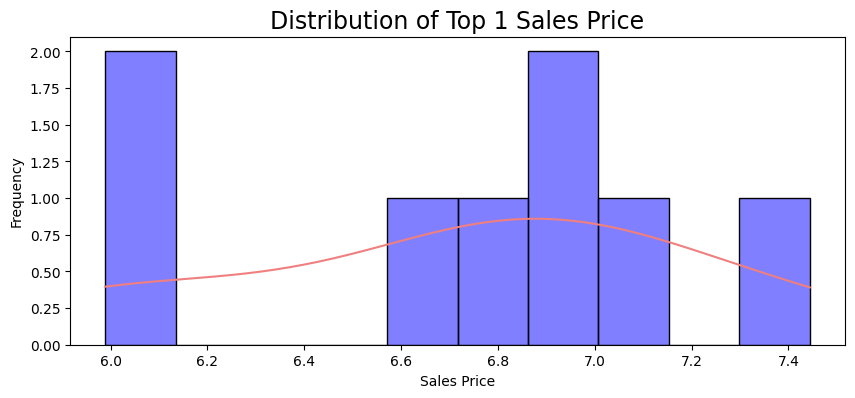

,Kolmogorov-Smirnov,Prob. (K-S),Shapiro-Wilk,Prob. (S-W)
,0.177676,0.645378,0.93502,0.562836


In [45]:
plt.figure(figsize=(10,4), dpi=100)
ax = sns.histplot(data=transform,bins=10,kde=True, color="blue")
ax.lines[0].set_color("lightcoral")
plt.xlabel("Sales Price")
plt.ylabel("Frequency")
plt.title("Distribution of Top 1 Sales Price", fontsize=17)

plt.show()

ks_stat,ks_pval = lilliefors(transform,dist="norm",pvalmethod="approx")
sw_stat,sw_pval = shapiro(transform)
pd.DataFrame({
    "Kolmogorov-Smirnov":[ks_stat],
    "Prob. (K-S)":[ks_pval],
    "Shapiro-Wilk":[sw_stat],
    "Prob. (S-W)":[sw_pval]
},index=[""])

Berdasarkan keluaran diatas terlihat secara visual sebarannya kurang lebih simetris sehingga terkesan berdistribusi normal. Maka secara formal probabilitas Kolmogorov-Smirnov $= 0.65 > \alpha = 0.05$ dan p-values ​​Shapiro-Wilk $= 0.56 > \alpha = 0.05$ sehingga dapat disimpulkan bahwa data berdistribusi normal. Oleh karena itu asumsi normalitas secara visual dan formal terpenuhi.

# Confidence Intervals

Urutkan 5 BOROUGH tertinggi berdasarkan mean SALE_PRICE dari kategori BUILDING_CLASS_AT_PRESENT tahun 2017

In [46]:
top_5 = mct[mct["YEAR"] == 2017].sort_values("MEAN",ascending=False).head(5)
top_5

,BOROUGH,BUILDING_CLASS_AT_PRESENT,YEAR,MEAN,MEDIAN,MODE,RANGE,VARIANCE,STANDARD_DEVIATION
109,Brooklyn,I,2017,1.070000e+06,1070000.0,975000.0,190000.0,1.805000e+10,134350.288425
101,Brooklyn,E,2017,1.012385e+06,1050000.0,1000000.0,1524000.0,1.886589e+11,434348.849517
33,Manhattan,R,2017,8.978346e+05,895041.0,10.0,1556799.0,1.274793e+11,357042.404200
73,Bronx,O,2017,8.868223e+05,941756.0,450000.0,960000.0,1.339007e+11,365924.399856
147,Queens,E,2017,8.539279e+05,707000.0,1250000.0,1297657.0,2.274052e+11,476870.214816


Bagi kumpulan data berdasarkan BOROUGH, BUILDING_CLASS_AT_PRESENT, dan YEAR yang memiliki 5 rata-rata tertinggi dalam SALE_PRICE. Kemudian buat array SALE_PRICE

In [47]:
temp = []
for i,j,k in zip(top_5["BOROUGH"],top_5["BUILDING_CLASS_AT_PRESENT"],top_5["YEAR"]):
    temp.append(outliers_removed[(outliers_removed["BOROUGH"] == i) & 
                                 (outliers_removed["BUILDING_CLASS_AT_PRESENT"] == j) &
                                 (outliers_removed["YEAR"] == k)])
    
top_5_sale_price = np.array(pd.concat(temp)["SALE_PRICE"])
top_5_sale_price

array([ 975000., 1165000.,  585000., ...,  610000., 1450000.,  660000.])

Melakukan pengambilan sampel berulang sebanyak 500 kali dari kumpulan data yang disimpan dalam array top_5_sale_price. Setiap kali diambil, sampel sebanyak 30 nilai dipilih, dan rata-ratanya dihitung. Hasil rata-rata dari setiap sampel disimpan dalam array sample_means. 

In [48]:
np.random.seed(807)
sample_means = []
n = 30 
for sample in range(0,500):
    sample_values = np.random.choice(a = top_5_sale_price, size = n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

Histogram ini memberikan gambaran visual tentang distribusi rata-rata sampel dari 500 pengambilan sampel berukuran 30 dari top_5_sale_price. 

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


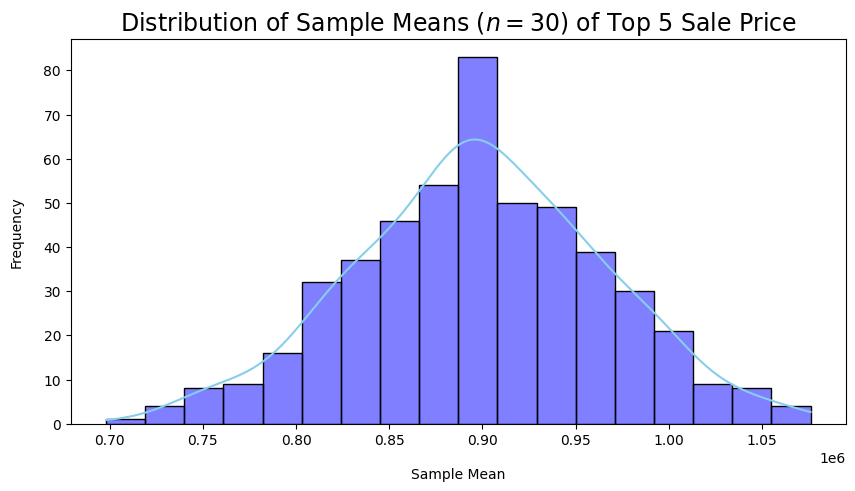

In [49]:
plt.figure(figsize=(10,5),dpi=100)
ax = sns.histplot(data=sample_means,kde=True,color="blue")
ax.lines[0].set_color("skyblue")
plt.title("Distribution of Sample Means ($n=30$) of Top 5 Sale Price", fontsize=17)
plt.xlabel("Sample Mean", labelpad=14)
plt.ylabel("Frequency", labelpad=14);
plt.show()

Menghitung nilai z-score, Menghitung mean sample_means, Menghitung standar deviasi sample_means, Menghitung standar deviasi top_5_sale_price, Menghitung standar error top_5_sale_price, Menghitung batas bawah top_5_sale_price, dan Menghitung batas atas top_5_sale_price

In [50]:
conf = 0.95
z = NormalDist().inv_cdf((1 + conf) / 2)
z 

1.9599639845400536

In [51]:
mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

898275.1747999999

In [52]:
std_of_sample_means = np.std(sample_means)
std_of_sample_means

66908.81983262519

In [53]:
pop_std_dev = top_5_sale_price.std()
pop_std_dev

357812.7052316646

In [54]:
se_pop = pop_std_dev/np.sqrt(n)
se_pop

65327.36333910982

In [55]:
lower = mean_of_sample_means - z*se_pop
lower

770235.8954503824

In [56]:
upper = mean_of_sample_means + z*se_pop
upper

1026314.4541496175

Menggunakan kernel density estimate (KDE) untuk memplot distribusi rata-rata sampel (sample_means). Selain itu, kode juga menambahkan area bayangan untuk menunjukkan interval kepercayaan sekitar rata-rata sampel.

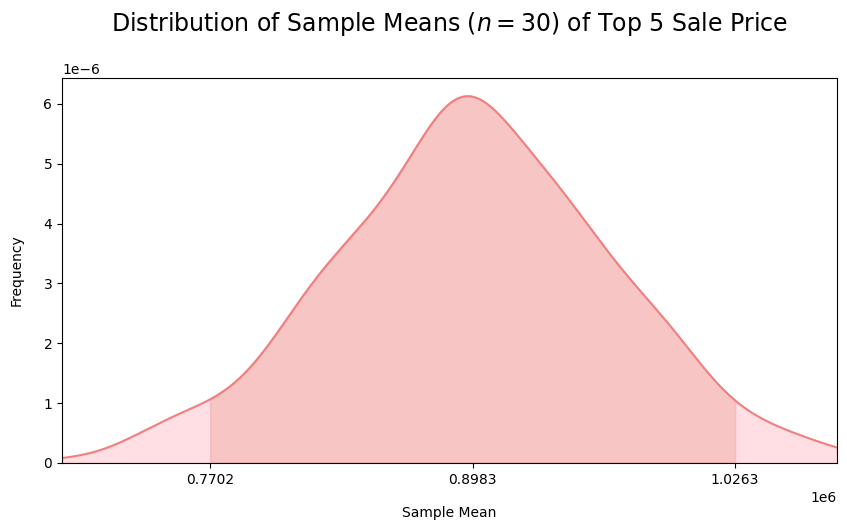

In [57]:
plt.figure(figsize=(10,5),dpi=100)
kde = gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color="lightcoral")
shade = np.linspace(lower, upper, 300)

plt.fill_between(shade, kde(shade), alpha=0.45, color='lightcoral')
plt.xticks([lower,mean_of_sample_means,upper])
plt.xlim(xmin=np.min(sample_means),xmax=np.max(sample_means))
plt.ylim(ymin=0)

left = np.linspace(np.min(sample_means),lower,10000)
right = np.linspace(upper,np.max(sample_means),10000)
for i in [left,right]:
    plt.fill_between(i,kde(i),color="pink",alpha=0.5)
    
# plt.text(x=154, y=0.01, horizontalalignment='center', fontsize=3, s="95% of sample means fall within\nthis shaded area of plus or minus\n1.96 z-scores from the mean", bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.1"))
plt.title("Distribution of Sample Means ($n=30$) of Top 5 Sale Price", y=1.1, fontsize=17)
plt.xlabel("Sample Mean", labelpad=14)
plt.ylabel("Frequency", labelpad=14);
plt.show()

Berdasarkan plot, ditentukan bahwa ada kemungkinan $95\%$ bahwa rata-rata sampel $N = 30$ akan berada dalam area yang diarsir merah muda. Jadi, peluang rata-rata sampel dengan $N = 30$ berada di luar area yang diarsir merah muda adalah $100\% - 95\%$ atau $5\%$.